<a href="https://colab.research.google.com/github/Josh1313/Bmw_Preprocessing/blob/modelos_regresion/Torneo_de_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns              # Visualizacion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df = joblib.load("/content/drive/MyDrive/Basic_python/Archivos nuevos/limpio2.joblib")

In [39]:
# pd.options.display.float_format = '{:.0f}'.format

# Le pasaremos nuestros datos a un modelos que se llama Lazy predict y hara por nosotros un Torneo de modelo para tener una base para distinguir que modelo trabaja mejor para nuestro conjunto de datos

 A este conjunto de datos le normalizamos la variable target precio y tambien para empezar siempre revisamos nuestros datos con los primero 6 codigos para verificar cualquier discrepancia

In [40]:
df.shape

(4717, 48)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4717 non-null   float64
 1   potencia                     4717 non-null   float64
 2   volante_regulable            4717 non-null   bool   
 3   aire_acondicionado           4717 non-null   bool   
 4   camara_trasera               4717 non-null   bool   
 5   asientos_traseros_plegables  4717 non-null   bool   
 6   elevalunas_electrico         4717 non-null   bool   
 7   bluetooth                    4717 non-null   bool   
 8   gps                          4717 non-null   bool   
 9   alerta_lim_velocidad         4717 non-null   bool   
 10  precio                       4717 non-null   float64
 11  tiemo_venta                  4717 non-null   int64  
 12  year_registro                4717 non-null   int64  
 13  mes_registro      

In [42]:
df.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_XSERIES
0,140411.00,100.00,True,True,False,False,True,True,True,False,...,0,1,0,0,0,0,0,0,0,0
1,13929.00,317.00,True,True,False,False,False,True,True,True,...,0,0,0,0,0,0,0,0,1,0
2,183297.00,120.00,False,False,False,False,True,False,True,False,...,0,0,0,1,0,0,0,0,0,0
3,128035.00,135.00,True,True,False,False,True,True,True,True,...,0,0,0,0,1,0,0,0,0,0
4,97097.00,160.00,True,True,False,False,False,True,True,True,...,0,0,0,0,1,0,0,0,0,0


In [43]:
df.describe()

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,precio_log10,tipo_gasolina_diesel,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_XSERIES
count,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,...,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00,4717.00
mean,139448.22,129.49,16136.59,64.07,2012.58,6.15,2017.99,4.93,4.15,0.96,...,0.01,0.12,0.01,0.37,0.02,0.24,0.01,0.01,0.01,0.22
std,57527.45,39.14,9087.51,26.98,2.20,3.31,0.28,2.15,0.22,0.19,...,0.09,0.32,0.10,0.48,0.14,0.43,0.08,0.11,0.08,0.42
min,64.00,25.00,1500.00,7.00,1995.00,1.00,2007.00,1.00,3.18,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,101705.00,100.00,11100.00,49.00,2012.00,3.00,2018.00,3.00,4.05,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,140084.00,120.00,14300.00,58.00,2013.00,6.00,2018.00,5.00,4.16,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,174690.00,135.00,18800.00,71.00,2014.00,9.00,2018.00,7.00,4.27,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,484615.00,423.00,178500.00,274.00,2017.00,12.00,2018.00,9.00,5.25,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [44]:
df.isnull().sum()

km                             0
potencia                       0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
tiemo_venta                    0
year_registro                  0
mes_registro                   0
year_venta                     0
mes_venta                      0
precio_log10                   0
tipo_gasolina_diesel           0
tipo_gasolina_electro          0
tipo_gasolina_hybrid_petrol    0
tipo_gasolina_petrol           0
color_beige                    0
color_black                    0
color_blue                     0
color_brown                    0
color_green                    0
color_grey                     0
color_orange                   0
color_red                      0
color_silver                   0
color_whit

In [45]:
df.duplicated().sum()

0

<Axes: >

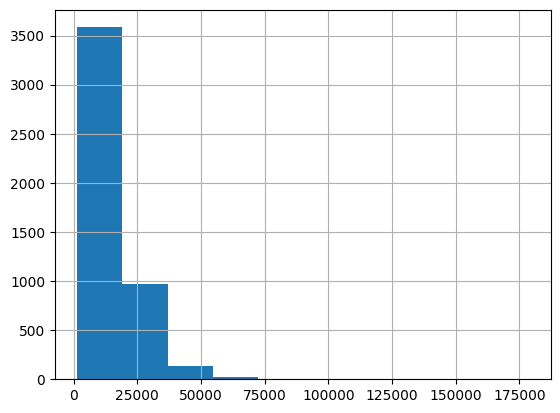

In [46]:
df['precio'].hist()

<Axes: >

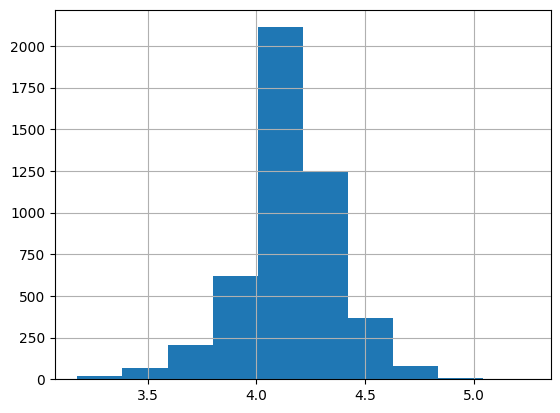

In [47]:
df['precio_log10'].hist()

In [48]:
del df['precio']

In [49]:
# Instalamos en nuestro entorno

In [50]:
pip install lazypredict


In [51]:

from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data features y Target
X = df.drop("precio_log10", axis=1)
y = df["precio_log10"]
# Split data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos los datos
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Crear un estimador LazyRegressor
reg = LazyRegressor(predictions=True)

# Ajustamos el modelo y obtenemos las métricas
models = reg.fit(X_train_s, X_test_s, y_train, y_test)

# Imprimimos las métricas
print(models)


100%|██████████| 42/42 [00:43<00:00,  1.03s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 3301, number of used features: 41
[LightGBM] [Info] Start training from score 4.153685
(                                     Adjusted R-Squared  \
Model                                                     
LGBMRegressor                                      0.86   
HistGradientBoostingRegressor                      0.86   
ExtraTreesRegressor                                0.85   
GradientBoostingRegressor                          0.85   
RandomForestRegressor                              0.85   
HuberRegressor                                     0.84   
Ridge                                              0.84   
RidgeCV                                            0.84   
Bayes